# Monthly heat balance

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cmo
import glob
from tqdm import tqdm
import sys
import calendar

In [3]:
def eddy_filter_300km(var):
    '''
    Input: varibale numpy arary with dimensions [time, z, y, z]
    Return: 500km-rolling-mean var and eddy fields
    '''
    from scipy.ndimage import uniform_filter
    var_500km_mean, var_eddy = np.ma.masked_all(var.shape), np.ma.masked_all(var.shape)
        
    for t in range(var.shape[0]):
        var_500km_mean[t] = uniform_filter(var[t], size = 120, mode = 'constant')
        var_eddy[t]       = var[t] - var_500km_mean[t]
    return var_eddy

In [4]:
case_name = 'Weak'

In [5]:
heat_balance_files_SC = glob.glob('../monthly_ml_heat_budget_data_small_mesoscale/' + case_name + 
                                  '/monthly_ml_heat_balance_2016-*_' + case_name + 'Eddies.nc')
heat_balance_files = sorted(heat_balance_files_SC)
len(heat_balance_files_SC), heat_balance_files_SC[:]

(12,
 ['../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-04_WeakEddies.nc',
  '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-10_WeakEddies.nc',
  '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-07_WeakEddies.nc',
  '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-03_WeakEddies.nc',
  '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-09_WeakEddies.nc',
  '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-08_WeakEddies.nc',
  '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-02_WeakEddies.nc',
  '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-06_WeakEddies.nc',
  '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_heat_balance_2016-11_WeakEddies.nc',
  '../monthly_ml_heat_budget_data_small_mesoscale/Weak/monthly_ml_he

In [6]:
ds_SC_3 = xr.open_dataset(heat_balance_files_SC[1])
ds_SC_9 = xr.open_dataset(heat_balance_files_SC[8])
ds_SC_3, ds_SC_9

(<xarray.Dataset>
 Dimensions:        (eta_rho: 410, xi_rho: 1122)
 Coordinates:
   * eta_rho        (eta_rho) int64 50000 52500 55000 ... 1067500 1070000 1072500
   * xi_rho         (xi_rho) int64 0 2500 5000 7500 ... 2797500 2800000 2802500
 Data variables:
     eddy_adv_ml    (eta_rho, xi_rho) float64 ...
     temp_adv_ml    (eta_rho, xi_rho) float64 ...
     temp_rate_ml   (eta_rho, xi_rho) float64 ...
     temp1_rate_ml  (eta_rho, xi_rho) float64 ...
     shflux_ml      (eta_rho, xi_rho) float64 ...
     residual       (eta_rho, xi_rho) float64 ...
     SSTA           (eta_rho, xi_rho) float64 ...
     SSTA_rate      (eta_rho, xi_rho) float64 ...
     MLD            (eta_rho, xi_rho) float64 ...
     x_rho          (eta_rho, xi_rho) int64 ...
     y_rho          (eta_rho, xi_rho) int64 ...,
 <xarray.Dataset>
 Dimensions:        (eta_rho: 410, xi_rho: 1122)
 Coordinates:
   * eta_rho        (eta_rho) int64 50000 52500 55000 ... 1067500 1070000 1072500
   * xi_rho         (xi_rho) i

In [7]:
x_rho, y_rho = ds_SC_3.x_rho.data, ds_SC_3.y_rho.data

In [8]:
temp_rate_SC_3 = eddy_filter_300km(ds_SC_3.temp_rate_ml.data)
temp_adv_SC_3  = eddy_filter_300km(ds_SC_3.temp_adv_ml.data)
temp_diff_SC_3 = eddy_filter_300km(ds_SC_3.residual.data)
shflux_SC_3 = eddy_filter_300km(ds_SC_3.shflux_ml.data)

In [9]:
temp_rate_SC_9 = eddy_filter_300km(ds_SC_9.temp_rate_ml.data)
temp_adv_SC_9  = eddy_filter_300km(ds_SC_9.temp_adv_ml.data)
temp_diff_SC_9 = eddy_filter_300km(ds_SC_9.residual.data)
shflux_SC_9 = eddy_filter_300km(ds_SC_9.shflux_ml.data)

<ipython-input-13-757e7bb273b4>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = ax1.pcolormesh(X, Y, temp_rate_SC_3[60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
<ipython-input-13-757e7bb273b4>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im3 = ax3.pcolormesh(X, Y, temp_adv_SC_3[60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
<ipython-input-13-757e7bb273b4>:16: MatplotlibDeprecationWarning: shading='flat' whe

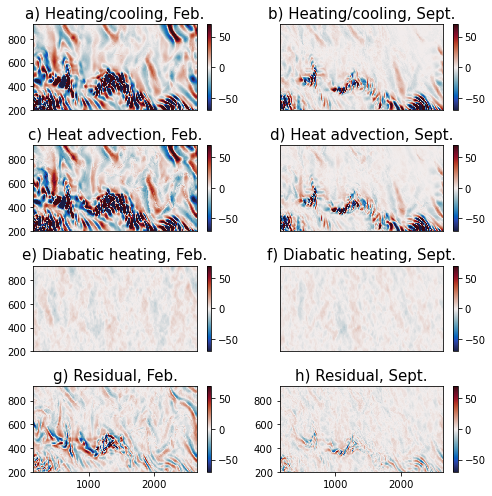

In [13]:
vmin, vmax = -70, 70
X, Y= x_rho[60:350, 60:1062]/1000, y_rho[60:350, 60:1062]/1000
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(figsize = (7, 7), nrows = 4, ncols = 2)
#plt.subplot(421)
ax1.set_title('a) Heating/cooling, Feb.', fontsize = 15)
im1 = ax1.pcolormesh(X, Y, temp_rate_SC_3[60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
fig.colorbar(im1, ax=ax1)
im1.axes.get_xaxis().set_visible(False)

ax3.set_title('c) Heat advection, Feb.', fontsize = 15)
im3 = ax3.pcolormesh(X, Y, temp_adv_SC_3[60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
im3.axes.get_xaxis().set_visible(False)
fig.colorbar(im3, ax=ax3)

ax5.set_title('e) Diabatic heating, Feb.', fontsize = 15)
im5 = ax5.pcolormesh(X, Y, shflux_SC_3[60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
ax5.set_xlabel('Distance(km)')
im5.axes.get_xaxis().set_visible(False)
fig.colorbar(im5, ax=ax5)

#plt.subplot(427)
ax7.set_title('g) Residual, Feb.', fontsize = 15)
im7 = ax7.pcolormesh(X, Y, temp_diff_SC_3[60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
fig.colorbar(im7, ax=ax7)

#vmin, vmax = -40, 40
#plt.subplot(422)
ax2.set_title('b) Heating/cooling, Sept.', fontsize = 15)
im2 = ax2.pcolormesh(X, Y, temp_rate_SC_9[60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
fig.colorbar(im2, ax=ax2)
im2.axes.get_xaxis().set_visible(False)
im2.axes.get_yaxis().set_visible(False)

#plt.subplot(424)
ax4.set_title('d) Heat advection, Sept.', fontsize = 15)
im4 = ax4.pcolormesh(X, Y, temp_adv_SC_9[60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
im4.axes.get_xaxis().set_visible(False)
im4.axes.get_yaxis().set_visible(False)
fig.colorbar(im4, ax=ax4)

ax8.set_title('h) Residual, Sept.', fontsize = 15)
im8 = ax8.pcolormesh(X, Y, temp_diff_SC_9[60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
fig.colorbar(im8, ax=ax8)

ax6.set_title('f) Diabatic heating, Sept.', fontsize = 15)
im6 = ax6.pcolormesh(X, Y, shflux_SC_9[60:350, 60:1062], cmap = cmo.cm.balance, vmin = vmin, vmax= vmax)
ax6.set_xlabel('Distance(km)')
im6.axes.get_xaxis().set_visible(False)
im6.axes.get_yaxis().set_visible(False)
fig.colorbar(im6, ax=ax6)

plt.tight_layout()
plt.savefig('Fig08_hp_budget_WC.png')